In [ ]:
# Buisness objective:
- Create a model where the probability that a business goes bankrupt from different features.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file ='/content/bankruptcy-prevention (1)(2).csv'
df=pd.read_csv(file,encoding='latin')

In [3]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [4]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [5]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [7]:
df.shape

(250, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [9]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.isnull() #no null values

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245     True
246     True
247     True
248     True
249     True
Length: 250, dtype: bool

In [14]:
df.columns.duplicated()

array([False, False, False, False, False, False, False])

In [15]:
df.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

In [16]:
df["industrial_risk"].value_counts()

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

In [17]:
df[" management_risk"].value_counts()


1.0    119
0.5     69
0.0     62
Name:  management_risk, dtype: int64

In [18]:
df[" financial_flexibility"].value_counts()

0.0    119
0.5     74
1.0     57
Name:  financial_flexibility, dtype: int64

In [19]:
df[" credibility"].value_counts()

0.0    94
1.0    79
0.5    77
Name:  credibility, dtype: int64

In [20]:
df[" competitiveness"].value_counts()

0.0    103
1.0     91
0.5     56
Name:  competitiveness, dtype: int64

In [21]:
df[" operating_risk"].value_counts()

1.0    114
0.0     79
0.5     57
Name:  operating_risk, dtype: int64

# Rename the columns

In [22]:
df1 = df.rename({' industrial_risk': ' Industrial',
                 ' management_risk': 'Management',
                 ' financial_flexibility': 'Financial',
                 ' credibility': 'Credibility',
                 ' competitiveness': 'Competitive',
                 ' operating_risk': 'Operational',
                ' class' : 'class'},
                axis=1)

In [23]:
df1.head()

,industrial_risk,Management,Financial,Credibility,Competitive,Operational,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Using distplot

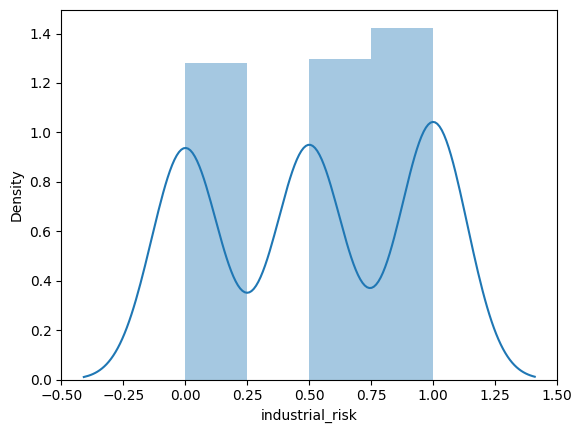

In [37]:
sns.distplot(df1['industrial_risk'])
plt.show()

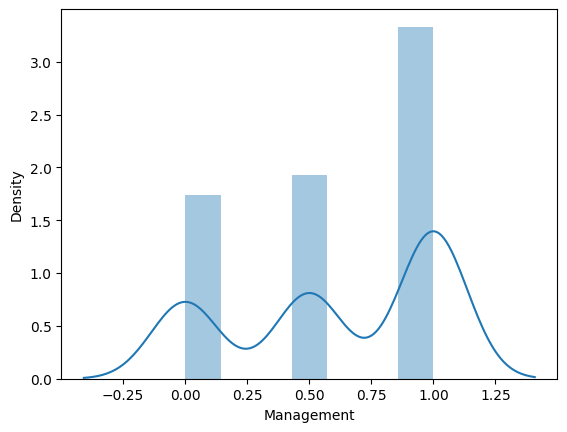

In [27]:
sns.distplot(df1['Management'])
plt.show()

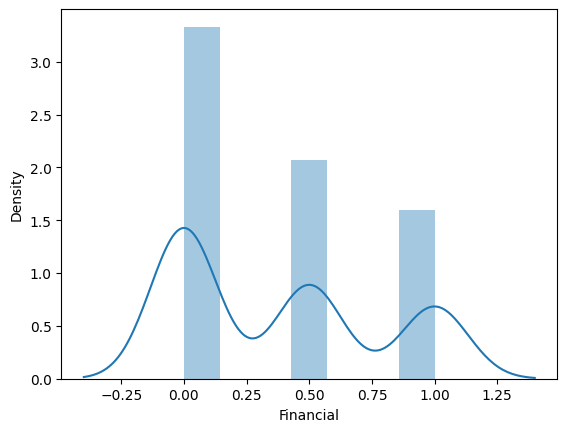

In [28]:
sns.distplot(df1['Financial'])
plt.show()

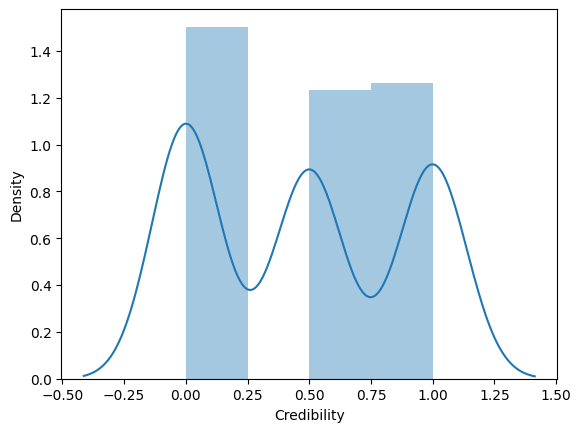

In [29]:
sns.distplot(df1['Credibility'])
plt.show()

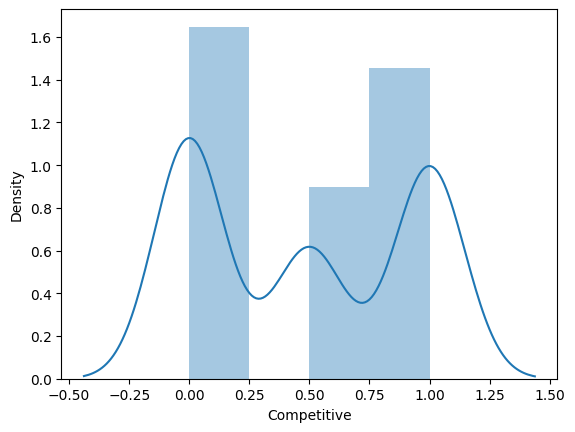

In [30]:
sns.distplot(df1['Competitive'])
plt.show()

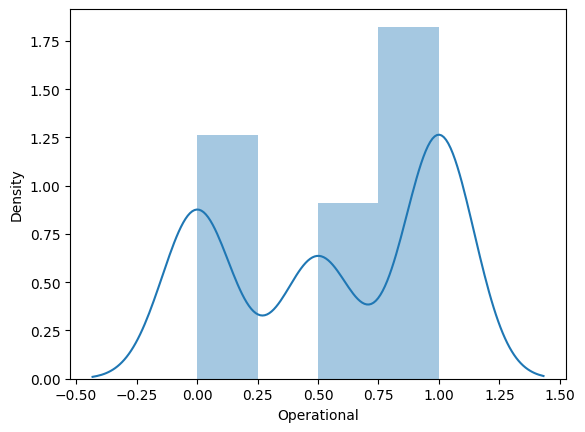

In [31]:
sns.distplot(df1['Operational'])
plt.show()

# Using Swarmplot

<Axes: ylabel='count'>

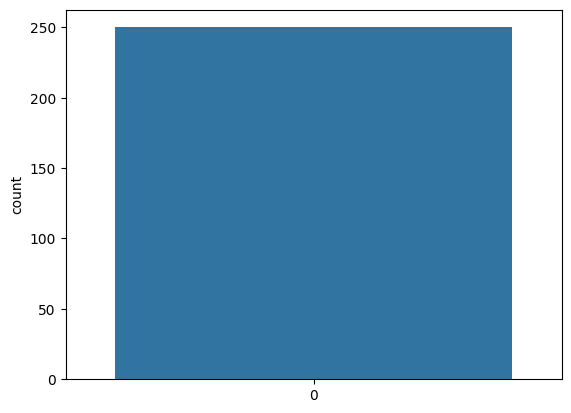

In [39]:
sns.countplot(df1['industrial_risk'])


<Axes: ylabel='count'>

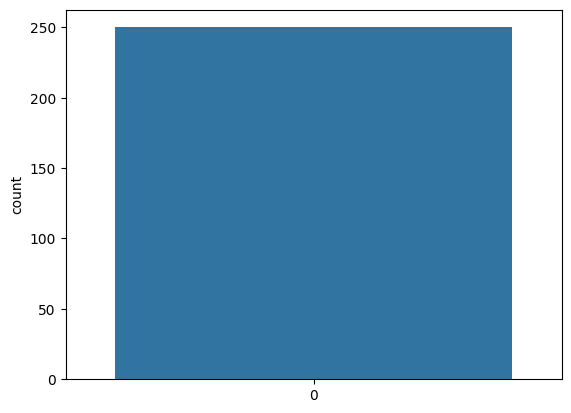

In [40]:
sns.countplot(df1['Management'])

# Using Boxplot

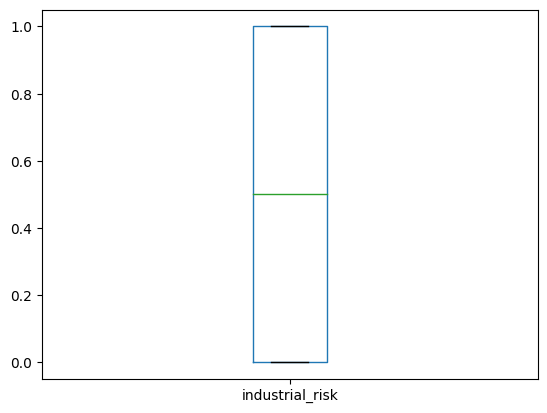

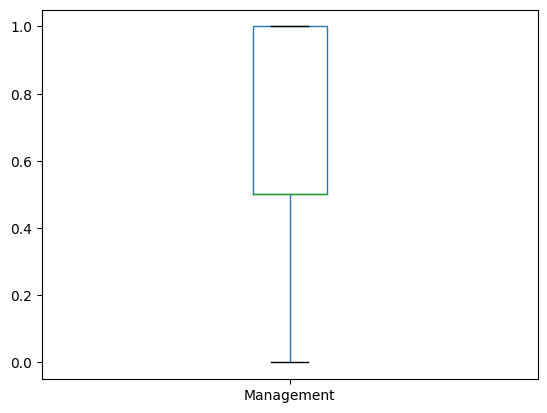

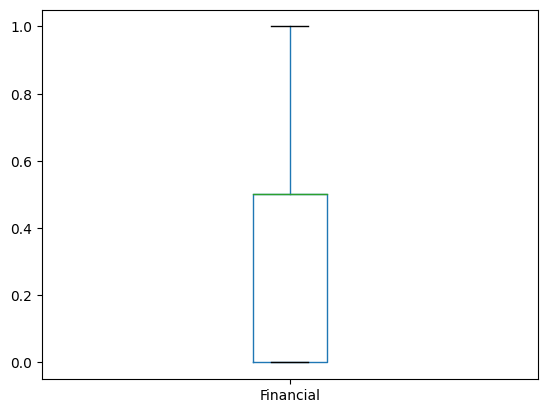

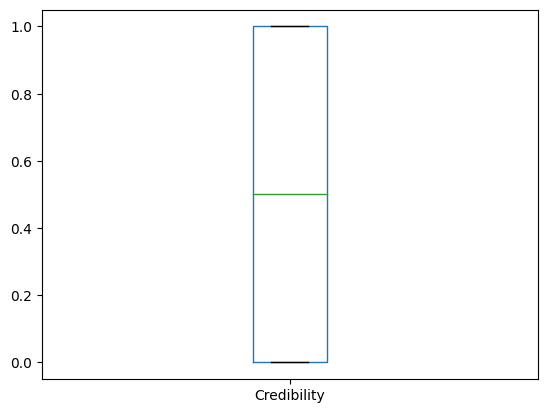

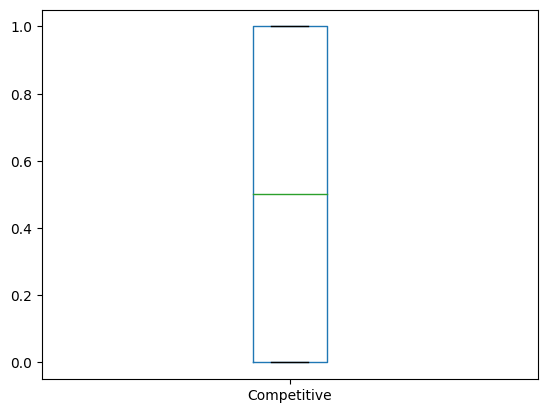

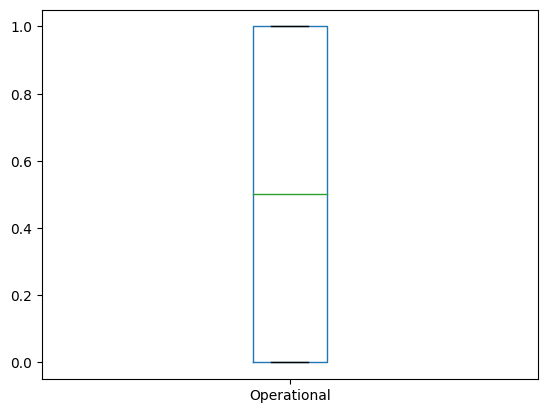

In [41]:
import matplotlib.pyplot as plt

def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

plot_boxplot(df1, "industrial_risk")


plot_boxplot(df1, "Management")


plot_boxplot(df1, "Financial")


plot_boxplot(df1, "Credibility")

plot_boxplot(df1, "Competitive")

plot_boxplot(df1, "Operational")

In [42]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1-1.5* IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls


index_list = []
for feature in ["industrial_risk","Management","Financial","Credibility","Competitive","Operational"]:
    index_list.extend(outliers(df1,feature))


index_list

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

df_cleaned = remove(df1,index_list)
df_cleaned.shape


df_cleaned.shape

(250, 7)

In [43]:
df1 = df_cleaned

In [44]:
df1.head()

,industrial_risk,Management,Financial,Credibility,Competitive,Operational,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


# Histogram

<Axes: >

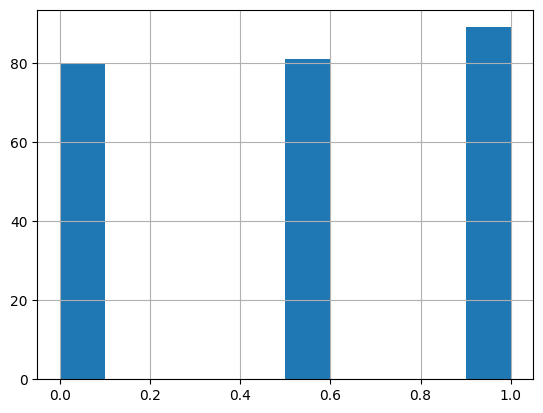

In [45]:
df1["industrial_risk"].hist()

<Axes: >

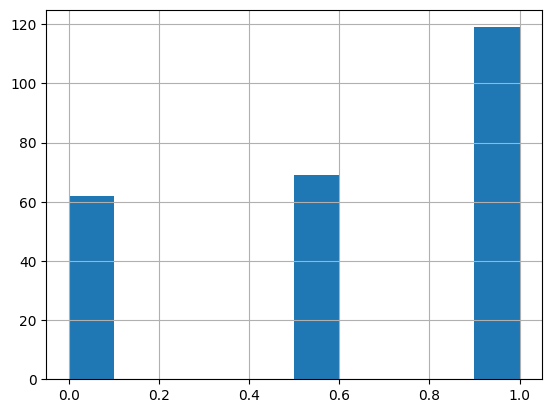

In [46]:
df1["Management"].hist()

<Axes: >

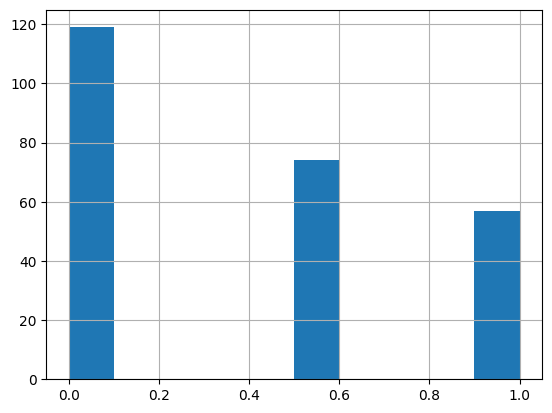

In [47]:
df1["Financial"].hist()

<Axes: >

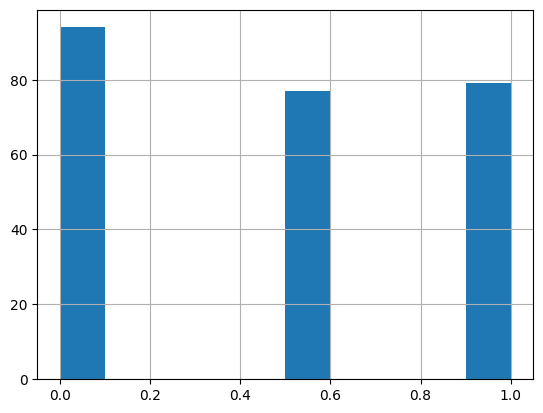

In [48]:
df1["Credibility"].hist()

<Axes: >

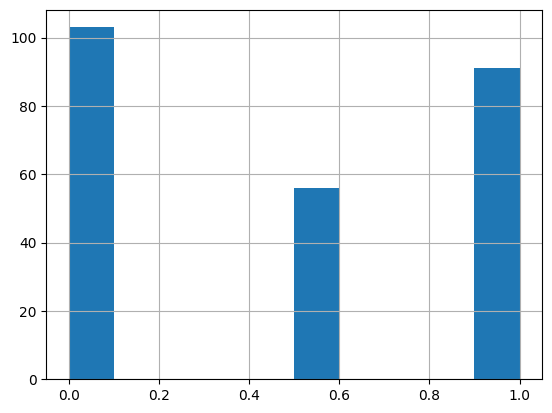

In [49]:
df1["Competitive"].hist()

<Axes: >

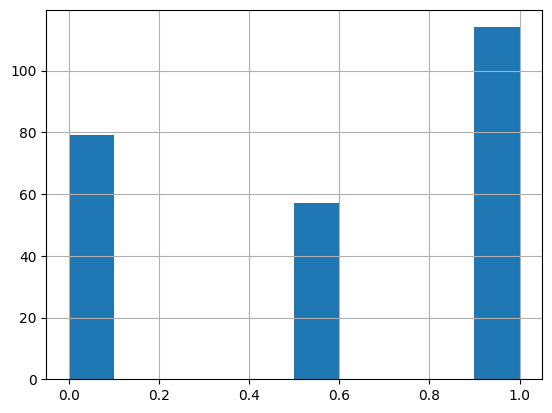

In [50]:
df1["Operational"].hist()


# Pairplot

<Figure size 800x800 with 0 Axes>

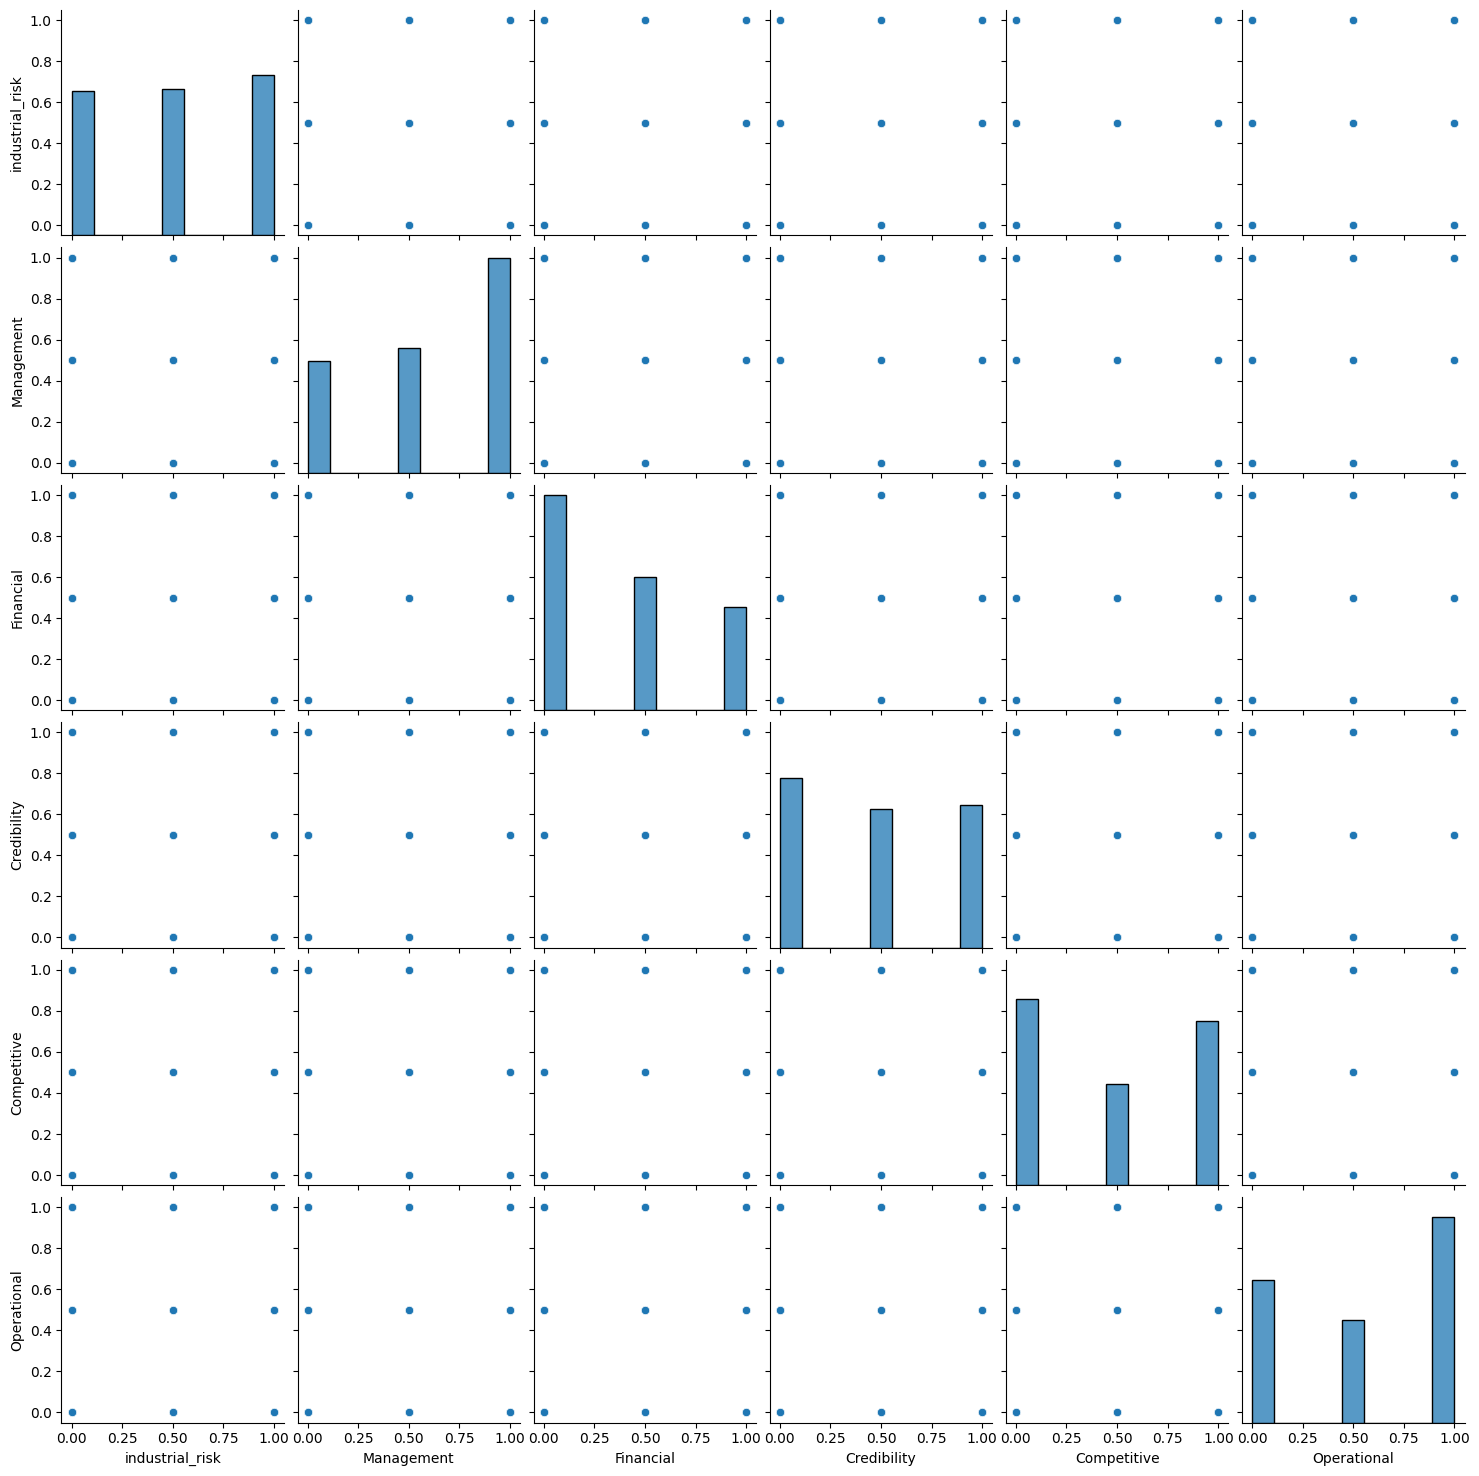

In [59]:
plt.figure(figsize=(8,8))
sns.pairplot(df1, palette='coolwarm')
plt.show()

# CoorRelation

In [54]:
df1.corr()

,industrial_risk,Management,Financial,Credibility,Competitive,Operational
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
Management,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
Financial,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
Credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
Competitive,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
Operational,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


# Finding the Skewness

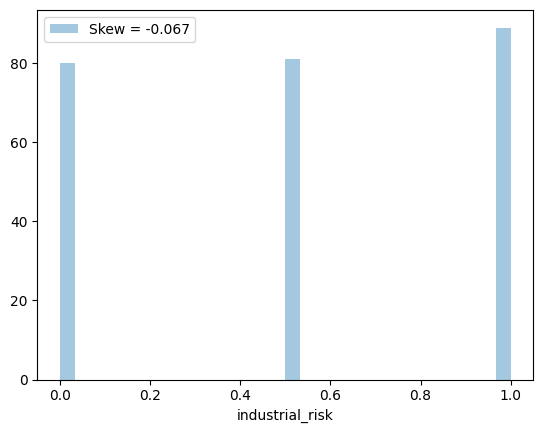

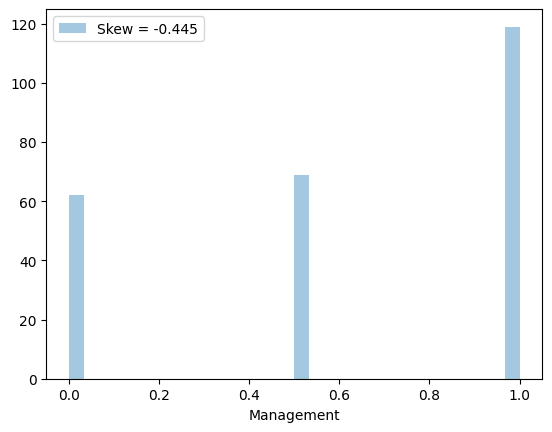

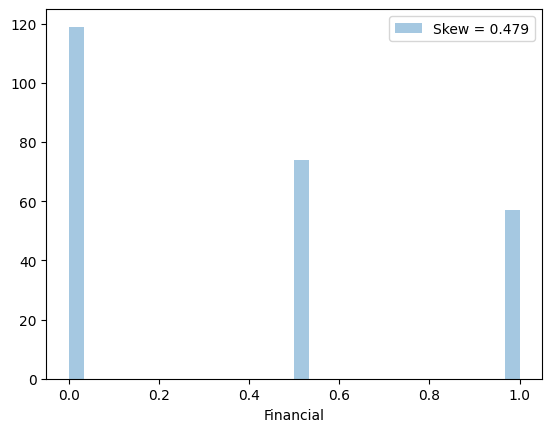

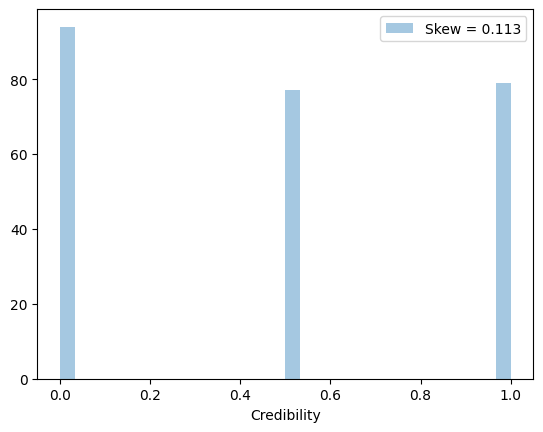

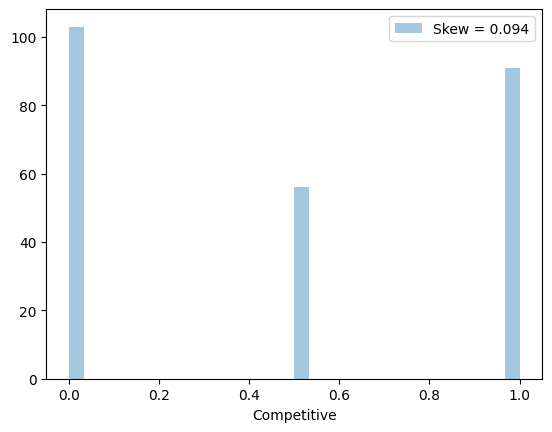

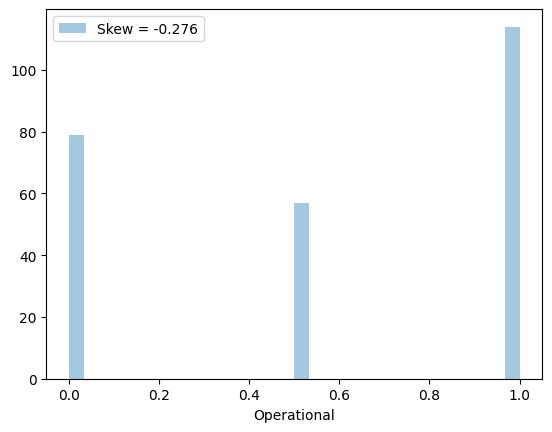

In [68]:
features=[feature for feature in df1.columns if df1[feature].dtypes != 'O']
for feat in features:
    skew = df1[feat].skew()
    sns.distplot(df1[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

# Heatmap

<Axes: >

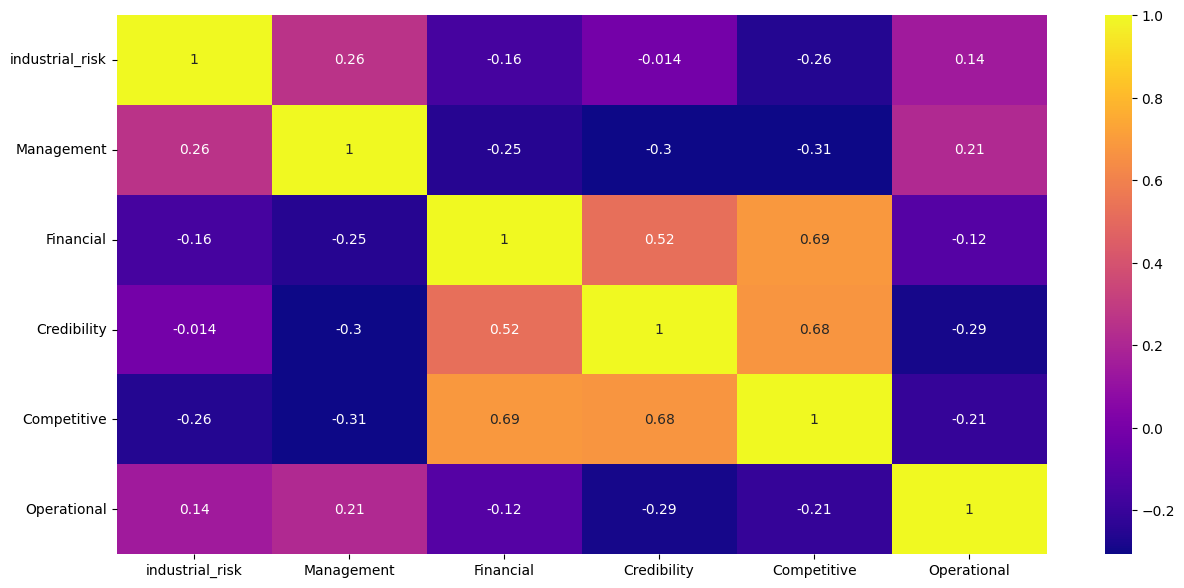

In [70]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(),annot=True,cmap='plasma')